In [1]:
from utils import *
from seaborn import heatmap

In [2]:
path_simus = Path('./alpha_tracker/')
path_index = path_simus / 'index.parquet'

In [3]:
index = pl.read_parquet(path_index)
len(index)

100

In [4]:
percentiles = [0.99, 0.90, 0.75, 0.50, 0.25, 0.10, 0.01]

# Check runs' counts

In [5]:
index_name = index.select(pl.col('^.*path.*$')).columns
assert len(index_name) == 1

In [6]:
paths = [str(path) for path in path_simus.glob('*') if path.stem != path_index.stem]
paths = pl.DataFrame(paths, schema=index_name).with_columns(pl.lit(True).alias('has_run'))
paths = index.join(paths, how='left', on=index_name[0]).with_columns(pl.col('has_run').fill_null(False))
paths.get_column('has_run').sum()

100

In [7]:
columns = ['cost_transaction', 'cost_shorting']
last_costs = [
    (params['path_alpha_tracker'], (
        pl.scan_parquet(params['path_alpha_tracker'])
        .select(pl.concat_list(pl.col(columns).max()).list.sum()).collect().item()
    )
    )
    for params in paths.iter_rows(named=True)
]
last_costs = pl.DataFrame(last_costs, schema=['path_alpha_tracker', 'cost'])
last_costs = last_costs.join(paths, on='path_alpha_tracker')

<Axes: ylabel='cost_transaction'>

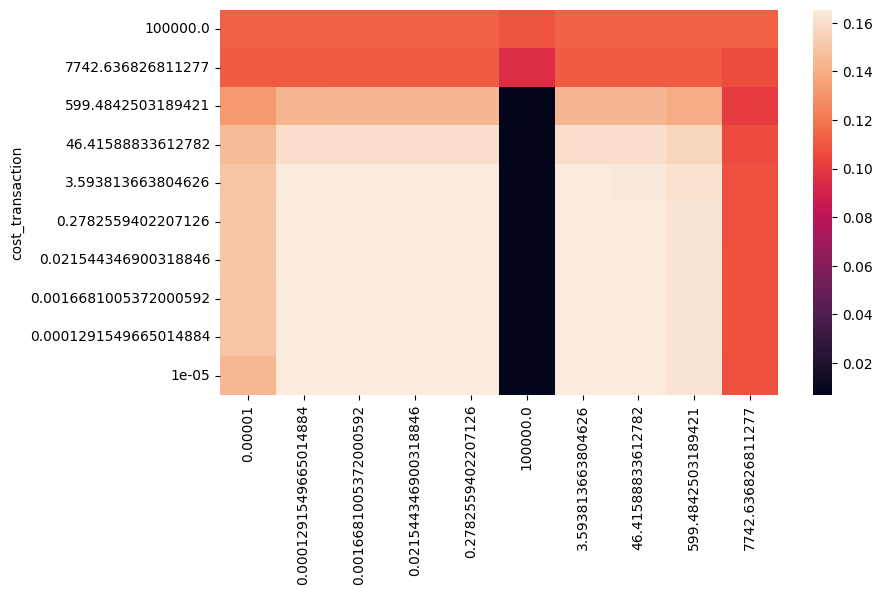

In [8]:
values = pivot_to_pd(last_costs, *columns, 'cost').sort_index(ascending=False)
heatmap(values)

In [9]:
values

,0.00001,0.0001291549665014884,0.0016681005372000592,0.021544346900318846,0.2782559402207126,100000.0,3.593813663804626,46.41588833612782,599.4842503189421,7742.636826811277
cost_transaction,,,,,,,,,,
100000.000000,0.113050,0.113050,0.113050,0.113050,0.113050,0.108837,0.113050,0.113048,0.113012,0.112644
7742.636827,0.111400,0.111365,0.111455,0.111455,0.111454,0.094969,0.111452,0.111419,0.111006,0.106169
599.484250,0.132167,0.143027,0.143469,0.143468,0.143467,0.007659,0.143351,0.143193,0.139823,0.100524
46.415888,0.145033,0.160108,0.160138,0.160105,0.160136,0.007068,0.160116,0.159809,0.156497,0.105449
3.593814,0.149035,0.164796,0.164892,0.164891,0.164890,0.006965,0.164870,0.164615,0.161224,0.107379
0.278256,0.149711,0.164990,0.165314,0.165314,0.165313,0.006957,0.165273,0.165038,0.161658,0.107795
0.021544,0.149813,0.165214,0.165348,0.165347,0.165346,0.006956,0.165327,0.165072,0.161693,0.107828
0.001668,0.149113,0.165258,0.165350,0.165350,0.165349,0.006956,0.165330,0.165075,0.161695,0.107817
0.000129,0.149174,0.165060,0.165349,0.165350,0.165349,0.006956,0.165330,0.165075,0.161695,0.107831
